In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


df = pd.read_csv('air quality data.csv')
print(df.head())

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


In [3]:
print(df.describe())
print(df.isnull().sum())

              PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775    

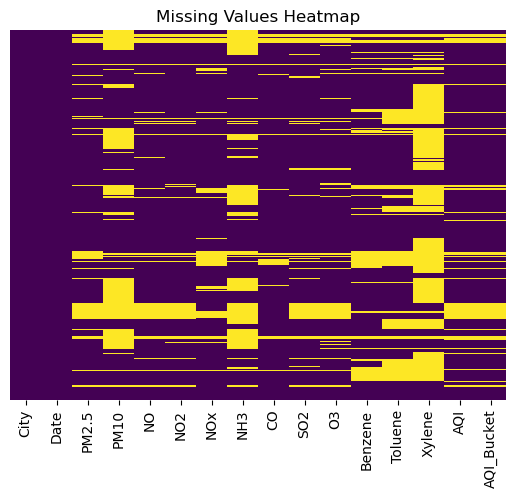

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df_filtered = df[(df['Date'].dt.year >= 2015) & (df['Date'].dt.year <= 2020)].copy()
df_filtered['AQI'] = df_filtered['AQI'].fillna(df_filtered['AQI'].mean())


Text(0, 0.5, 'Frequeny')

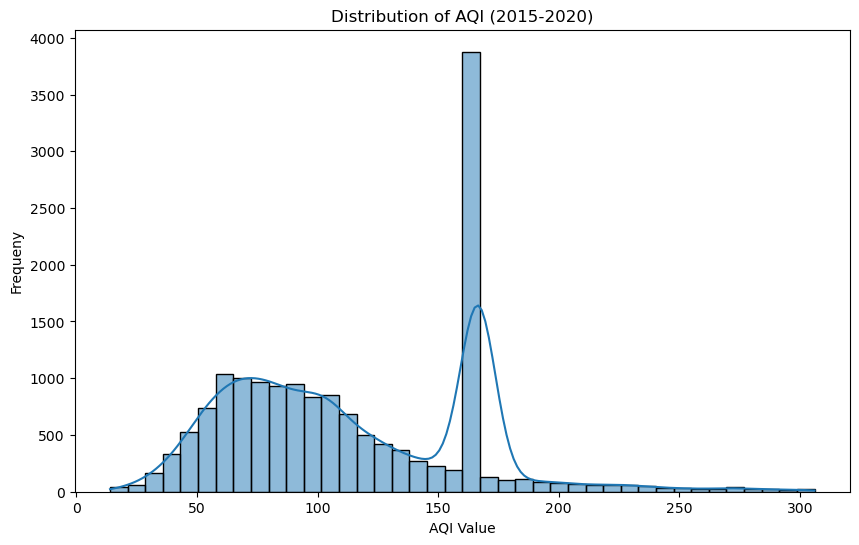

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['AQI'], kde=True)
plt.title('Distribution of AQI (2015-2020)')
plt.xlabel('AQI Value')
plt.ylabel('Frequeny')

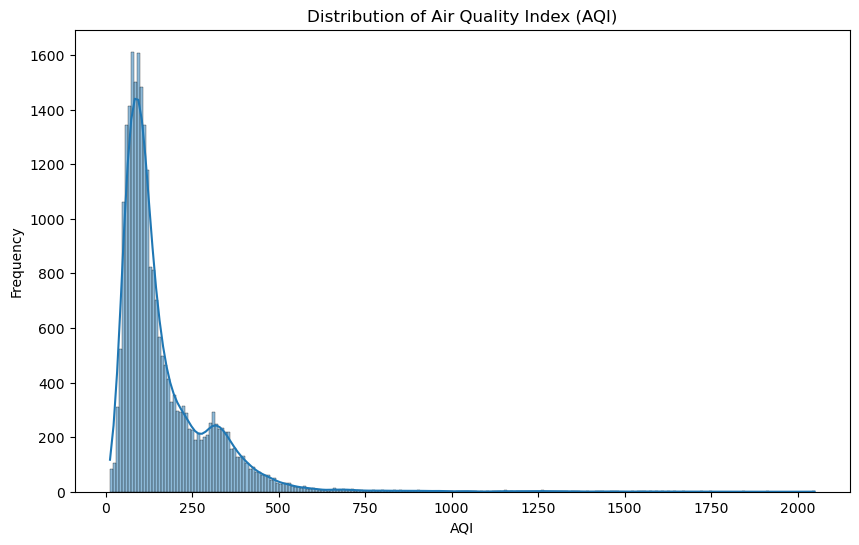

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'].dropna(), kde=True)
plt.title('Distribution of Air Quality Index (AQI)')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


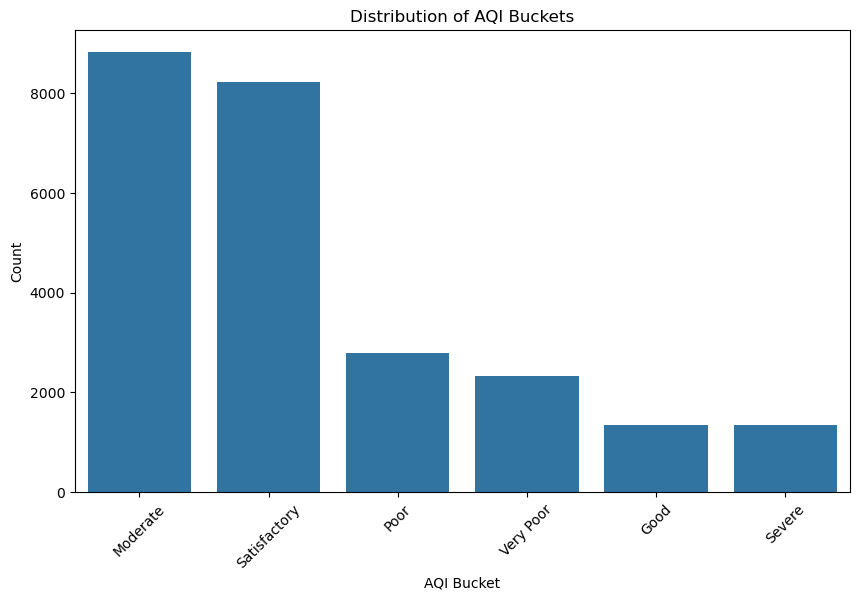

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AQI_Bucket', data=df, order = df['AQI_Bucket'].value_counts().index)
plt.title('Distribution of AQI Buckets')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [83]:
def remove_outliers_iqr(data, column, threshold=1.5):
    """Removes outliers from a specified column using the IQR method."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
  
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return filtered_data, outliers

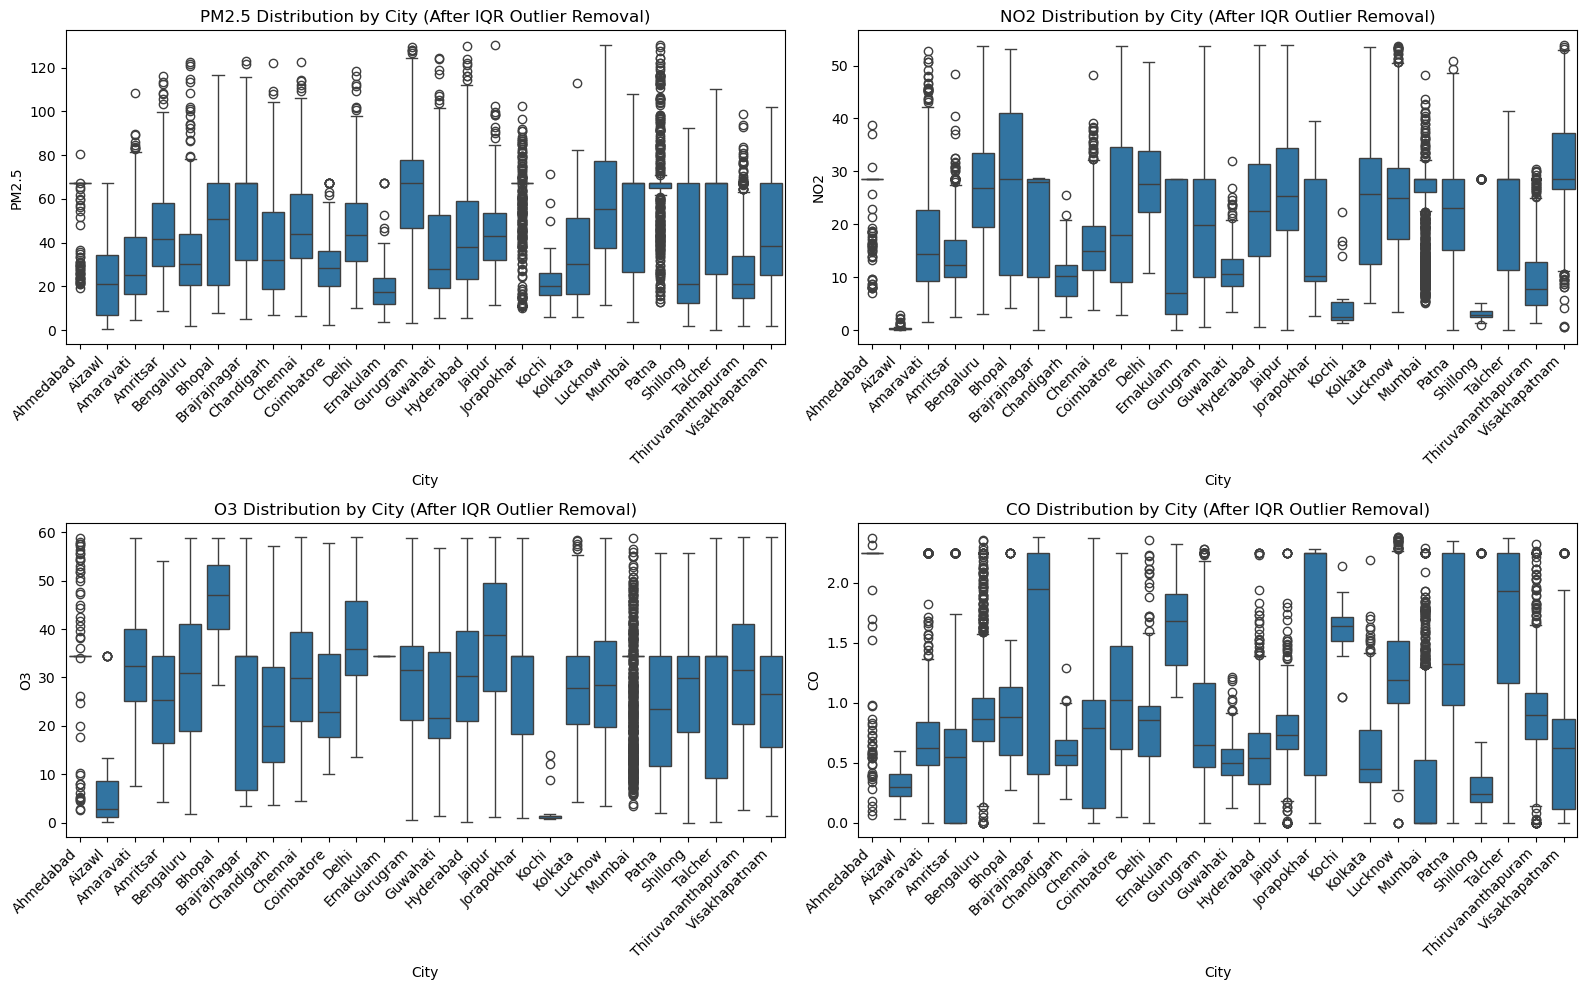

In [85]:

# 2. Bivariate Analysis (using box plots to visualize the distribution of pollutants by city, after outlier handling)

# Select numerical columns for outlier removal
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Remove outliers for each selected column
for col in numerical_cols:
    df_filtered, outliers = remove_outliers_iqr(df_filtered, col)

# Boxplots after IQR outlier removal for PM2.5, NO2, O3, and CO (by City)
pollutants = ['PM2.5', 'NO2', 'O3', 'CO']
plt.figure(figsize=(16, 10))
for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='City', y=pollutant, data=df_filtered)
    plt.title(f'{pollutant} Distribution by City (After IQR Outlier Removal)')
    plt.xticks(rotation=45, ha='right')  # Rotate city names for better readability

plt.tight_layout()
plt.show()




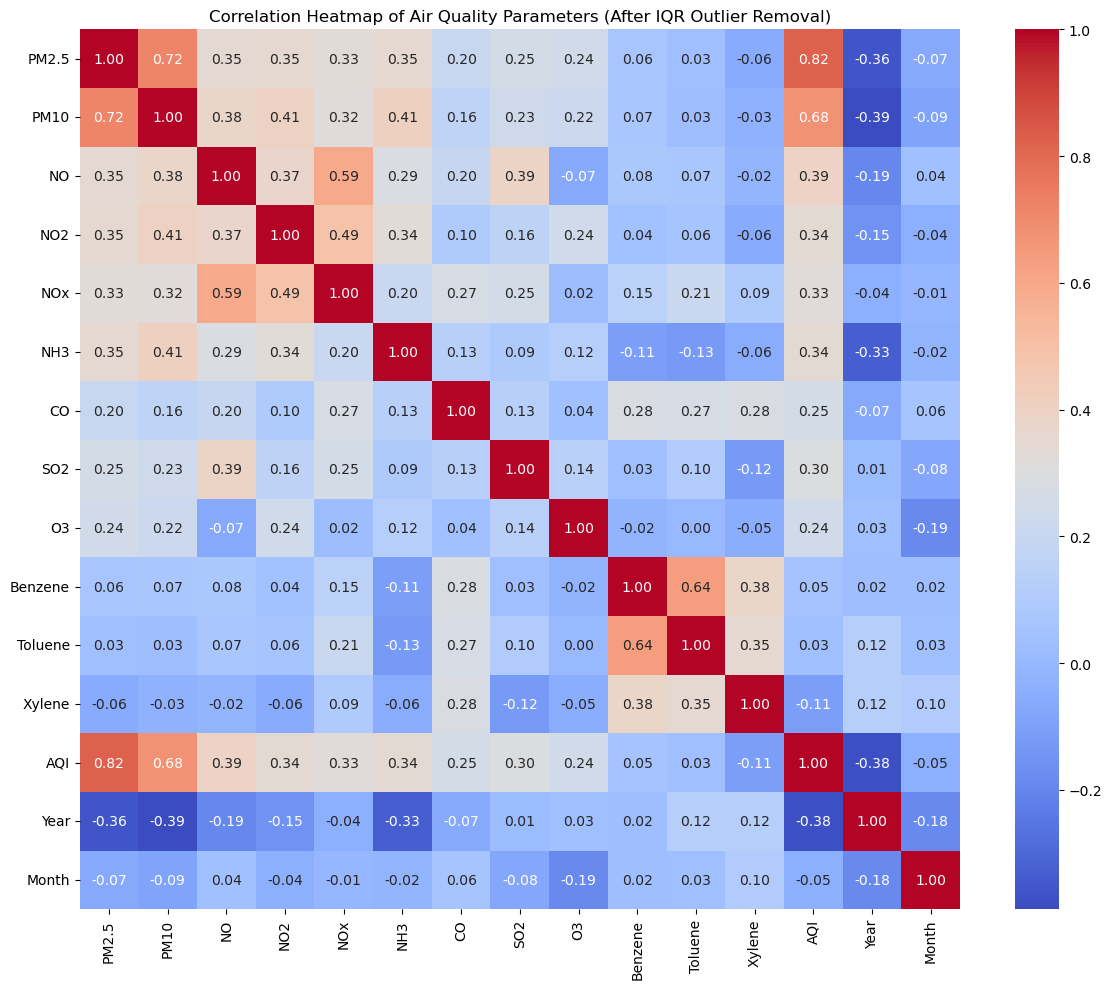

In [87]:
numerical_df = df_filtered.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Air Quality Parameters (After IQR Outlier Removal)')
plt.tight_layout()
plt.show()

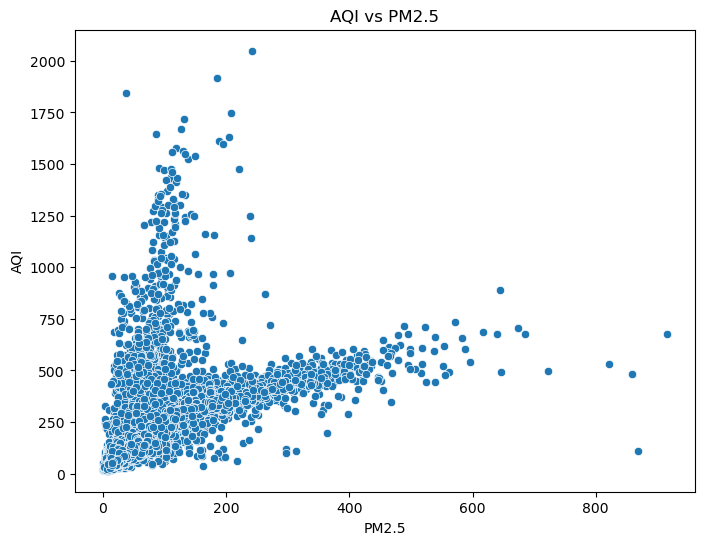

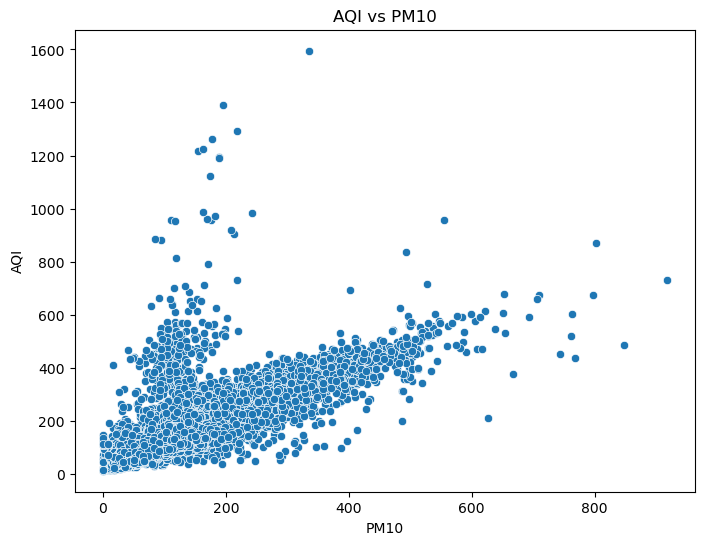

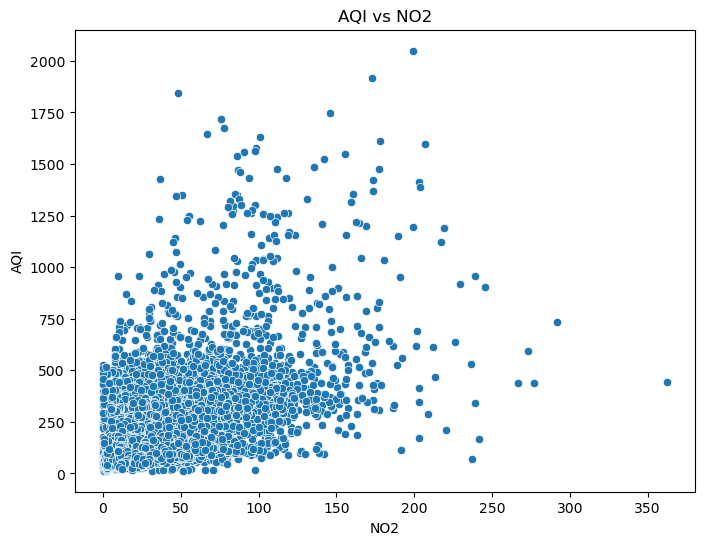

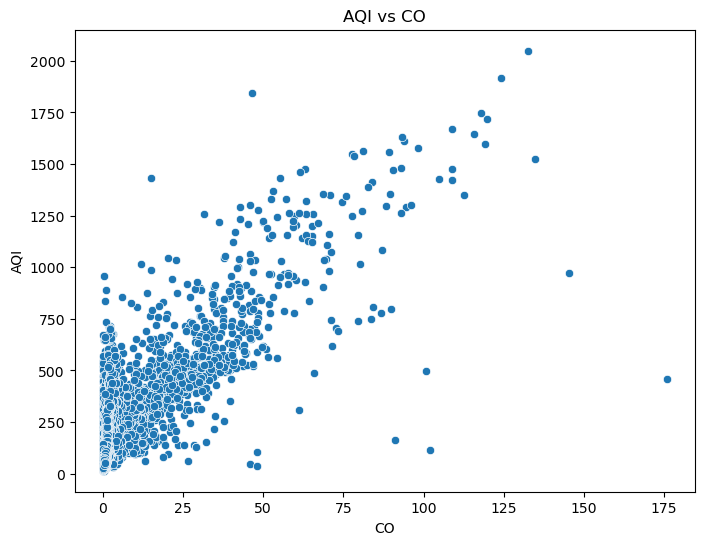

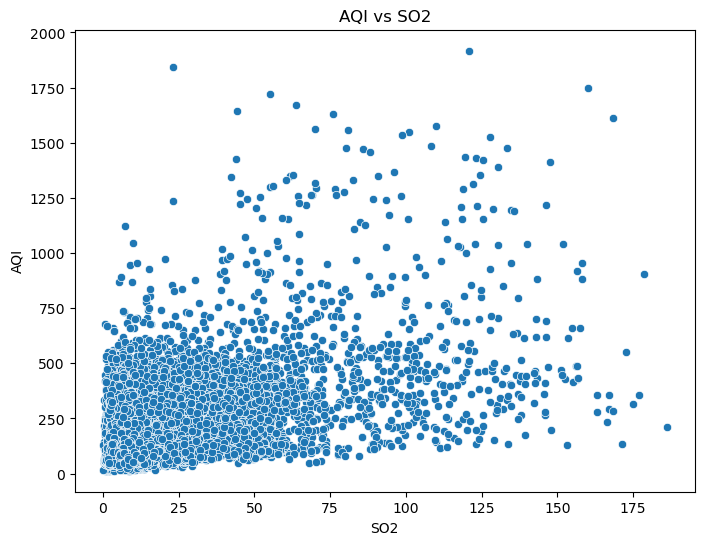

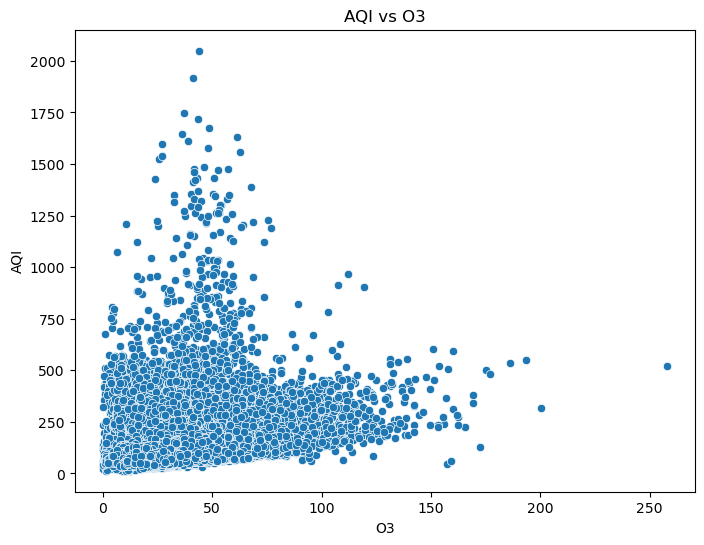

In [7]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

for pollutant in pollutants:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pollutant, y='AQI', data=df)
    plt.title(f'AQI vs {pollutant}')
    plt.xlabel(pollutant)
    plt.ylabel('AQI')
    plt.show()

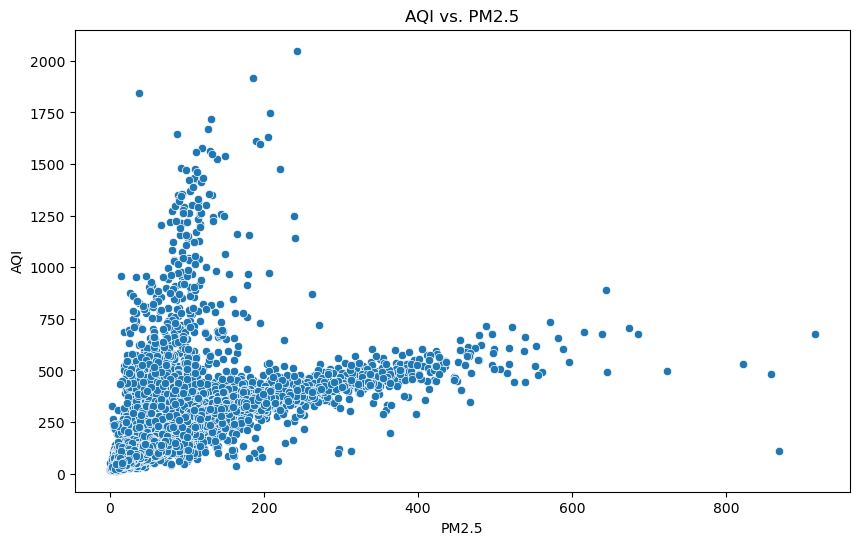

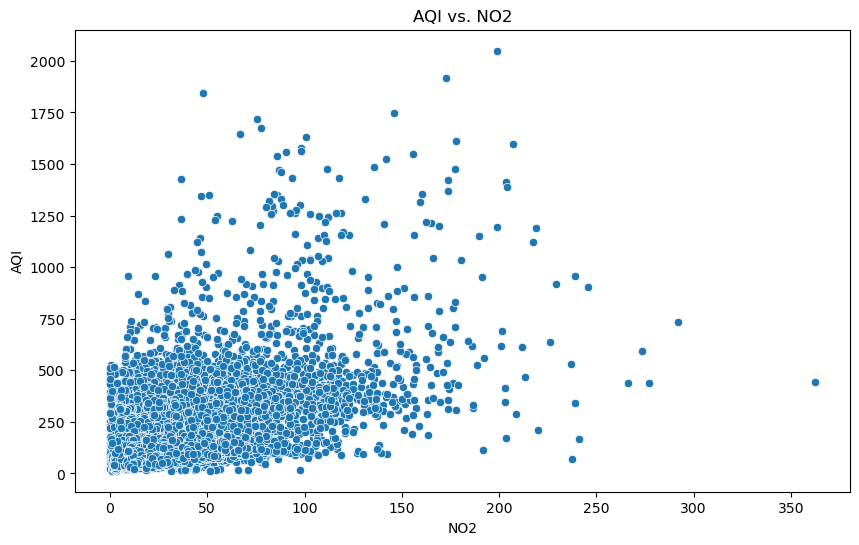

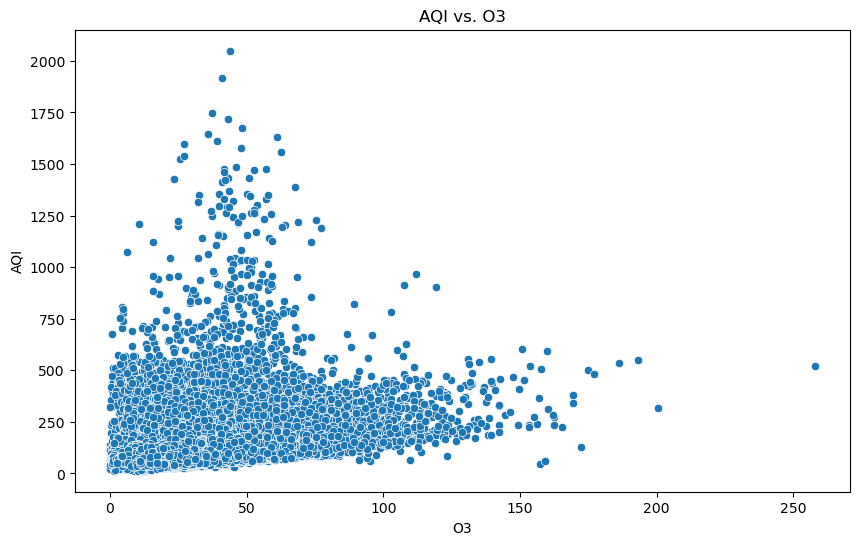

In [8]:
# Plotting AQI vs. PM2.5
plt.figure(figsize=(10,6))
sns.scatterplot(x='PM2.5', y='AQI', data=df)
plt.title('AQI vs. PM2.5')
plt.show()

# Plotting AQI vs. NO2
plt.figure(figsize=(10,6))
sns.scatterplot(x='NO2', y='AQI', data=df)
plt.title('AQI vs. NO2')
plt.show()

# Plotting AQI vs. O3
plt.figure(figsize=(10,6))
sns.scatterplot(x='O3', y='AQI', data=df)
plt.title('AQI vs. O3')
plt.show()


In [9]:
df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].mean())
df['PM10'] = df['PM10'].fillna(df['PM10'].mean())


In [10]:
df.fillna({'PM2.5': df['PM2.5'].mean(), 'PM10': df['PM10'].mean()}, inplace=True)


In [11]:
columns_to_fill = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mean())


In [12]:
df['Date'] = pd.to_datetime(df['Date'])


In [13]:
df['AQI'] = df['AQI'].fillna(df['AQI'].mean()) 
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [14]:
X = df[['NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'Year', 'Month']]
y = df['AQI']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred_lr = lr_model.predict(X_test)

In [18]:
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {lr_mse}, R2 Score: {lr_r2}")

Linear Regression MSE: 6424.335712674022, R2 Score: 0.573857048165969


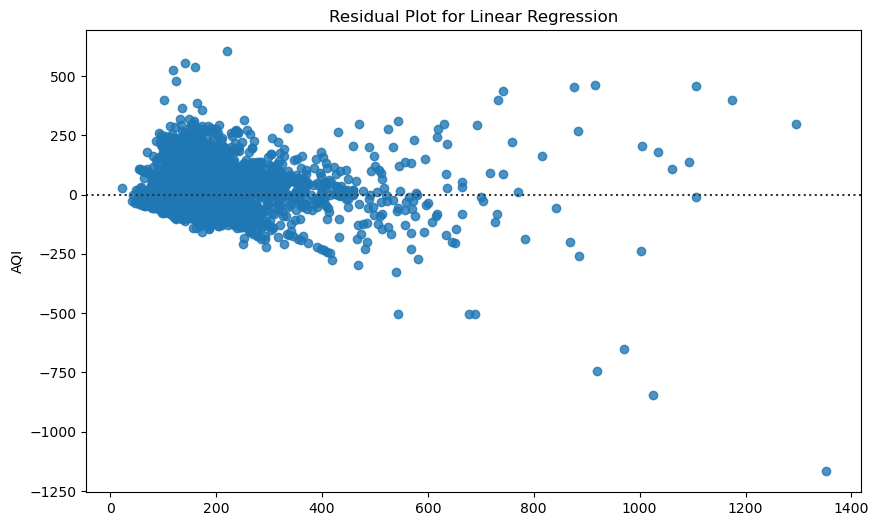

In [19]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred_lr, y=y_test-y_pred_lr)
plt.title('Residual Plot for Linear Regression')
plt.show()

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
y_pred_rf = rf_model.predict(X_test)

In [22]:
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {rf_mse}, R2 Score: {rf_r2}")

Random Forest MSE: 2951.1749492042677, R2 Score: 0.8042408646622409


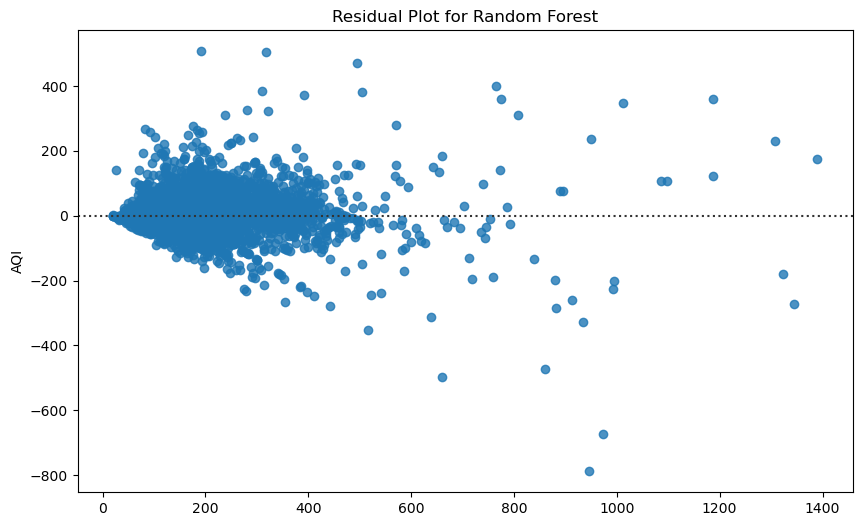

In [23]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred_rf, y=y_test-y_pred_rf)
plt.title('Residual Plot for Random Forest')
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [25]:
# Feature Scaling (Important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune the number of neighbors
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [27]:
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f'K-Nearest Neighbors MSE: {mse_knn:.2f}')

K-Nearest Neighbors MSE: 3527.03


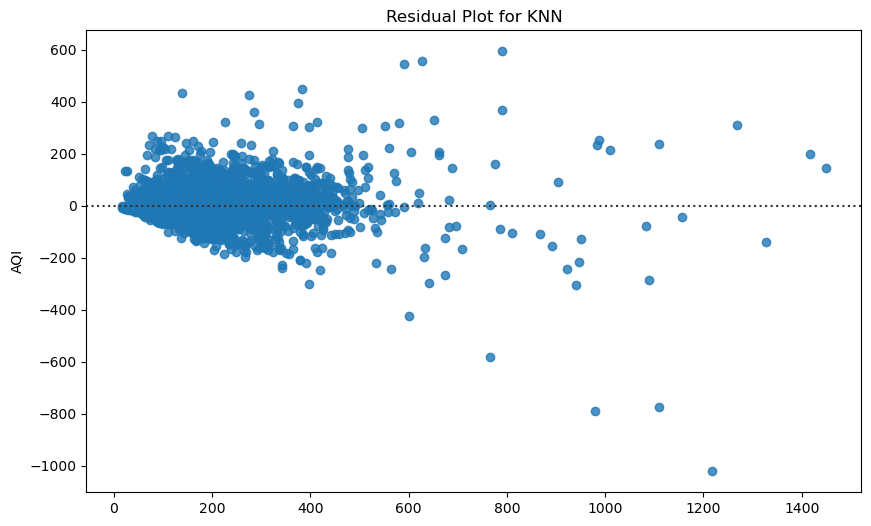

In [28]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred_knn, y=y_test-y_pred_knn)
plt.title('Residual Plot for KNN')
plt.show()

In [29]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [30]:
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Decision Tree MSE: {mse_dt:.2f}')

Decision Tree MSE: 6164.46


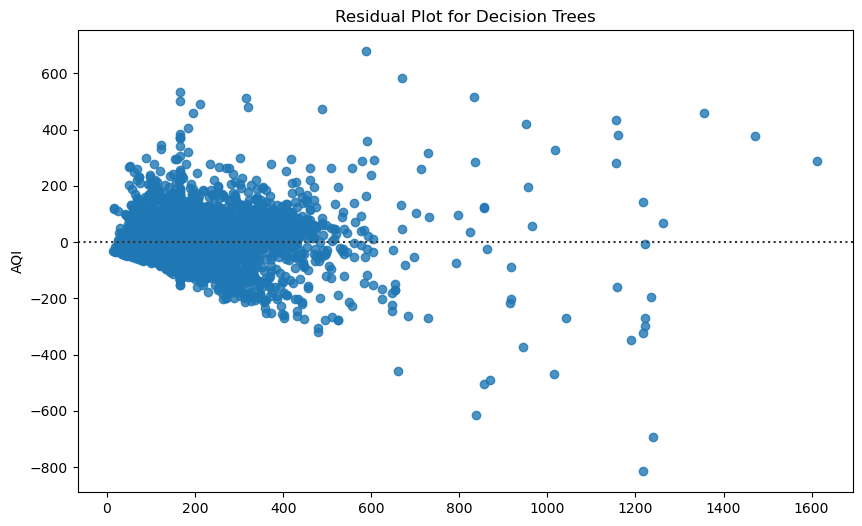

In [31]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred_dt, y=y_test-y_pred_dt)
plt.title('Residual Plot for Decision Trees')
plt.show()

In [32]:
print('\nModel Comparison (Mean Squared Error):')
print(f'  Linear Regression:   {lr_mse:.2f}')
print(f'  Random Forest:       {rf_mse:.2f}')
print(f'  K-Nearest Neighbors: {mse_knn:.2f}')
print(f'  Decision Tree:       {mse_dt:.2f}')


Model Comparison (Mean Squared Error):
  Linear Regression:   6424.34
  Random Forest:       2951.17
  K-Nearest Neighbors: 3527.03
  Decision Tree:       6164.46


(0.0, 7066.769283941425)

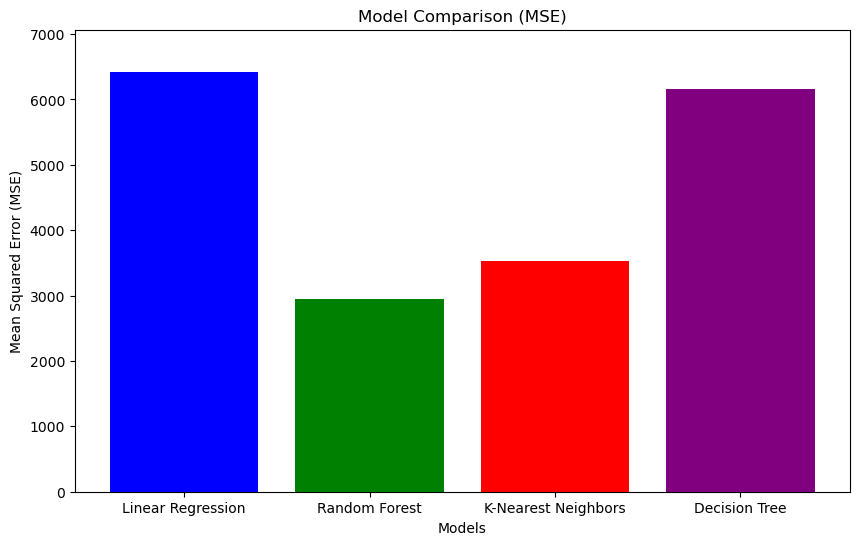

In [33]:

model_names = ['Linear Regression', 'Random Forest', 'K-Nearest Neighbors', 'Decision Tree']
mse_values = [lr_mse, rf_mse, mse_knn, mse_dt]

plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Comparison (MSE)')
plt.ylim(0, max(mse_values) * 1.1) 

